In [1]:
import requests as req
from bs4 import BeautifulSoup as bs

# import webbrowser
# webbrowser.open_new_tab('www.https://chat.openai.com/c/688f08b6-df41-4c21-9eda-96cafb5e7267')

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = req.get(url)
soup = bs(page.text, 'html')

In [2]:
# print(soup)
soup.find_all('table')[1]

In [ ]:
# one way to find the table is to use it's class name
soup.find('table', class_='wikitable sortable')

In [ ]:
# another way to find the table is to find all the table and index the one you desire
table = soup.find_all('table')[1]
print(table)

In [48]:
# we observe that the headers have a <th> tag, so we retrieve the headers accordingly
world_titles = table.find_all('th') #this renders our data as a list
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [49]:
# title.text removes the html synthax, <th> and returns the string. However, it includes the newline cmd, '\n', so we strip it
world_titles = [title.text.strip() for title in world_titles]
world_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [81]:
import pandas as pd
df = pd.DataFrame(columns=world_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [82]:
table.find_all('tr') #<tr> represents the rows and <td> represents the data in each column
column_data = table.findAll('tr') #this output is a list, so it is iterable


for row in column_data[1:]:
    row_data = row.find_all('td') # each is a list containing the data in each row seperated by commas
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [ ]:
df.to_csv(r'../top100companies.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


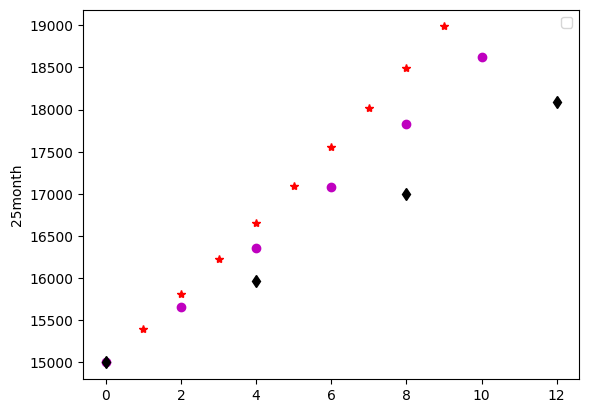

[15000, 16812.987630518845]


In [59]:
import matplotlib.pyplot as plt

initial_amount = 15000
n = 1 # number on of times that interest is compounded per year.

compound_interest = lambda principal, apy, t: principal*(1 + apy/(n*100))**(n*t/12)

seven_monthCD = [15000]
thirteen_monthCD = [15000]
twentyfive_monthCD = [15000]
thirty_seven_monthCD = [15000]
sixtyone_monthCD = [15000]

no_of_cycles = 9
count = 0
while count < no_of_cycles:
    seven_monthCD.append(compound_interest(seven_monthCD[-1], 4.59, 7))
    if count< no_of_cycles/2: thirteen_monthCD.append(compound_interest(thirteen_monthCD[-1], 4.07, 13))
    if count< no_of_cycles/4: twentyfive_monthCD.append(compound_interest(twentyfive_monthCD[-1], 3.04, 25))
    if count< no_of_cycles/4: thirty_seven_monthCD.append(compound_interest(thirty_seven_monthCD[-1], 2.53, 37))
    if count< no_of_cycles/9: sixtyone_monthCD.append(compound_interest(sixtyone_monthCD[-1], 2.27, 61))
    
    count += 1

plt.figure()
plt.plot(list(range(len(seven_monthCD))), seven_monthCD, '*r'); plt.ylabel('7month')
plt.plot(list(range(0, len(thirteen_monthCD)*2, 2)), thirteen_monthCD, 'om'); plt.ylabel('13month')
plt.plot(list(range(0, len(twentyfive_monthCD)*4, 4)), twentyfive_monthCD, 'dk'); plt.ylabel('25month')
# plt.plot(list(range(len(thirty_seven_monthCD))), thirty_seven_monthCD, '--b'); plt.title('37month')
# plt.plot(list(range(len(sixtyone_monthCD))), sixtyone_monthCD, '.k'); plt.title('61month')
plt.legend()
plt.show()

print(sixtyone_monthCD)

In [2]:
def triangular_sequence(n):
        """
        Generates a list of last elements from each row in a triangular arrangement of numbers 1 to n.
        
        Parameters:
            n (int): Total number of elements to be placed in the triangle.
        Returns:
            list: A list containing the last number of each row.
        """
        last_elements = []
        current_number = 1
        row_number = 1
        
        while current_number <= n:
            next_row_end = current_number + row_number - 1  # Calculate the last number of the current row
            if next_row_end > n:  # If the calculated end exceeds n, adjust it to n
                next_row_end = n
            last_elements.append(next_row_end)
            current_number = next_row_end + 1  # Start the next row after the last number of the current row
            row_number += 1  # Each new row has one more element than the last
        return last_elements



[1, 3, 6, 10, 15]